
#Previsão de "Hidden Gem Score"

Hidden Gem Score?
é o destaque da popularidade de um filme. Quanto maior a pontuação da joia escondida, maior a classificação do filme.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt 


In [ ]:
# Carregar o conjunto de dados
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/tcc/Netflix Dataset Latest 2021.csv")

In [ ]:
# Selecionar as colunas relevantes
relevant_columns = ["Rotten Tomatoes Score", "Metacritic Score", "Awards Received", "Awards Nominated For", "Boxoffice", "Hidden Gem Score"]
df = df[relevant_columns]


In [ ]:
# Remover linhas com valores ausentes
df.dropna(inplace=True)

# Converter a coluna "Boxoffice" para numérico
df["Boxoffice"] = df["Boxoffice"].str.replace("$", "").str.replace(",", "").astype(float)


<ipython-input-6-c1e998503d3e>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Boxoffice"] = df["Boxoffice"].str.replace("$", "").str.replace(",", "").astype(float)


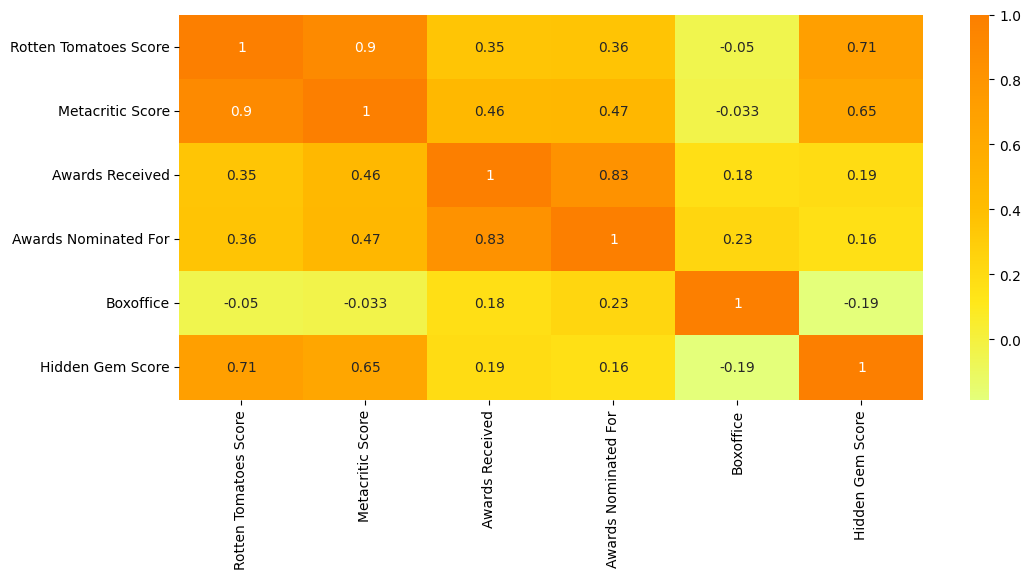

In [ ]:
#Visualizar correlação
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(), annot=True, cmap="Wistia")
plt.show()

In [ ]:
# Separar as variáveis de entrada (X) e o alvo (y)
X = df[["Rotten Tomatoes Score", "Metacritic Score", "Awards Received", "Awards Nominated For", "Boxoffice"]]
y = df["Hidden Gem Score"]

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Visualizar os valores testados
print("Valores testados:")
print(X_test)
print(y_test)


Valores testados:
      Rotten Tomatoes Score  Metacritic Score  Awards Received  \
7525                   50.0              49.0              4.0   
8977                   74.0              64.0              6.0   
8689                   91.0              72.0              8.0   
8680                   93.0              83.0             61.0   
6650                   18.0              41.0              1.0   
...                     ...               ...              ...   
4838                   25.0              34.0              2.0   
2529                   97.0              92.0             24.0   
7540                   79.0              68.0             35.0   
4573                   15.0              27.0              4.0   
7189                   55.0              54.0              1.0   

      Awards Nominated For    Boxoffice  
7525                   5.0  100328194.0  
8977                  15.0   19501238.0  
8689                  18.0    4010957.0  
8680                 

In [ ]:
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import HistGradientBoostingRegressor

modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()
modelo_histgdt = HistGradientBoostingRegressor()


In [ ]:
# Treinar o modelo
modelo_regressaolinear.fit(X_train, y_train)
modelo_arvoredecisao.fit(X_train, y_train)
modelo_histgdt.fit(X_train, y_train)

print("Modelos treinados")


Modelos treinados


In [ ]:
from sklearn import metrics

previsao_regressaolinear = modelo_regressaolinear.predict(X_train) 
previsao_arvoredecisao = modelo_arvoredecisao.predict(X_train)
previsao_histgdt = modelo_histgdt.predict(X_train)

print("Regressão Linear:", metrics.r2_score(y_train, previsao_regressaolinear))

print("Arvore de Decisão:", metrics.r2_score(y_train, previsao_arvoredecisao))  

print("Gradient Boosting baseado em Histogramas:", metrics.r2_score(y_train, previsao_histgdt))  

Regressão Linear: 0.541028621575621
Arvore de Decisão: 0.9520299296413599
Gradient Boosting baseado em Histogramas: 0.8953867563604133


<Axes: >

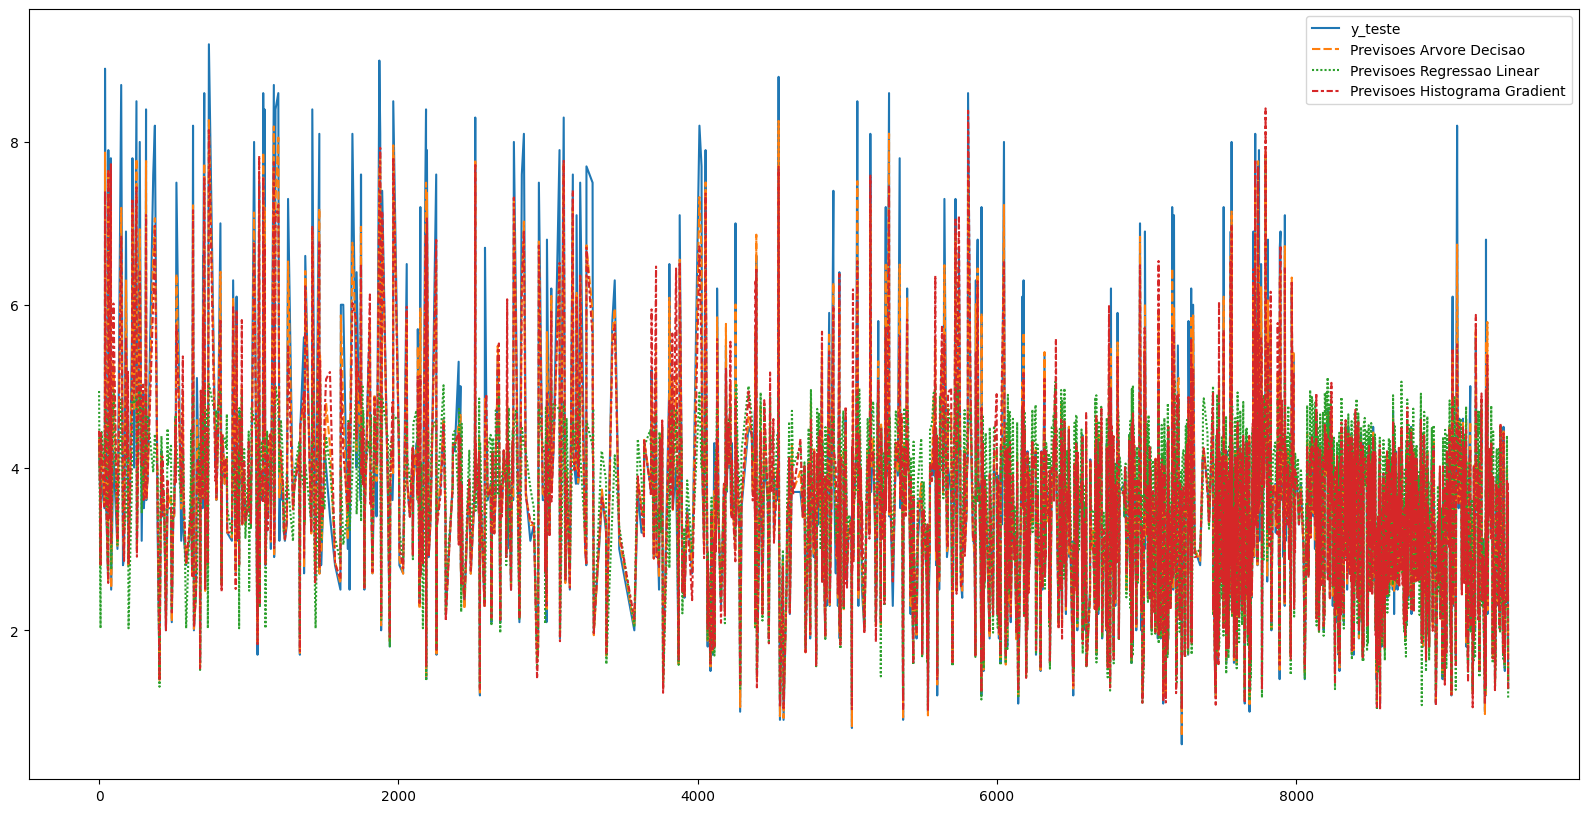

In [ ]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_train
tabela_auxiliar["Previsoes Arvore Decisao"] = previsao_arvoredecisao
tabela_auxiliar["Previsoes Regressao Linear"] = previsao_regressaolinear
tabela_auxiliar["Previsoes Histograma Gradient"] = previsao_histgdt

plt.figure(figsize=(20,10))

sns.lineplot(data=tabela_auxiliar)
# sns.FacetGrid(data=tabela_auxiliar)
# sns.PairGrid(data=tabela_auxiliar)
# sns.clustermap(data=tabela_auxiliar)
# sns.displot(data=tabela_auxiliar)
# sns.histplot(data=tabela_auxiliar)
# sns.relplot(data=tabela_auxiliar)
# sns.scatterplot(data=tabela_auxiliar)
# sns.kdeplot(data=tabela_auxiliar)
# sns.catplot(data=tabela_auxiliar)
# sns.barplot(data=tabela_auxiliar)

##Previsoes

In [ ]:
new_data = {
    "Rotten Tomatoes Score": 80,
    "Metacritic Score": 75,
    "Awards Received": 3,
    "Awards Nominated For": 5,
    "Boxoffice": 1000000,
}

# Converter os valores de entrada para um DataFrame
new_data_df = pd.DataFrame(new_data, index=[0])

previsao2 = modelo_regressaolinear.predict(new_data_df)
print("Previsão do Hidden Gem Score com Regressão Linear:", previsao2)

previsao1 = modelo_arvoredecisao.predict(new_data_df)
print("Previsão do Hidden Gem Score com Arvore de decisão:", previsao1)

previsao3 = modelo_histgdt.predict(new_data_df)
print("Previsão do Hidden Gem Score com Gradient Boosting baseado em Histogramas:", previsao3)


Previsão do Hidden Gem Score com Regressão Linear: [4.28875548]
Previsão do Hidden Gem Score com Arvore de decisão: [3.904]
Previsão do Hidden Gem Score com Gradient Boosting baseado em Histogramas: [3.77267377]
